# Dataset analysis

### Visualization of content

In [12]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

### Class distribution

### Dimension overview

https://www.kaggle.com/code/faldoae/exploratory-data-analysis-eda-for-image-datasets

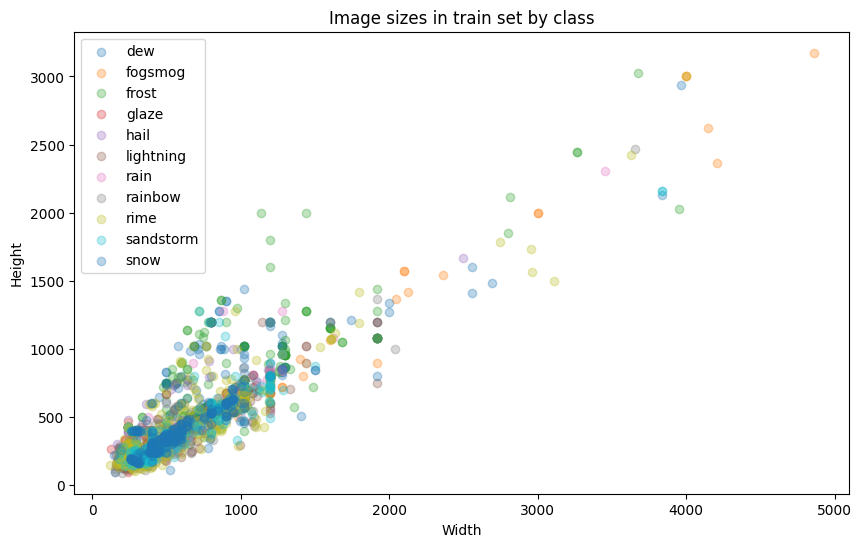

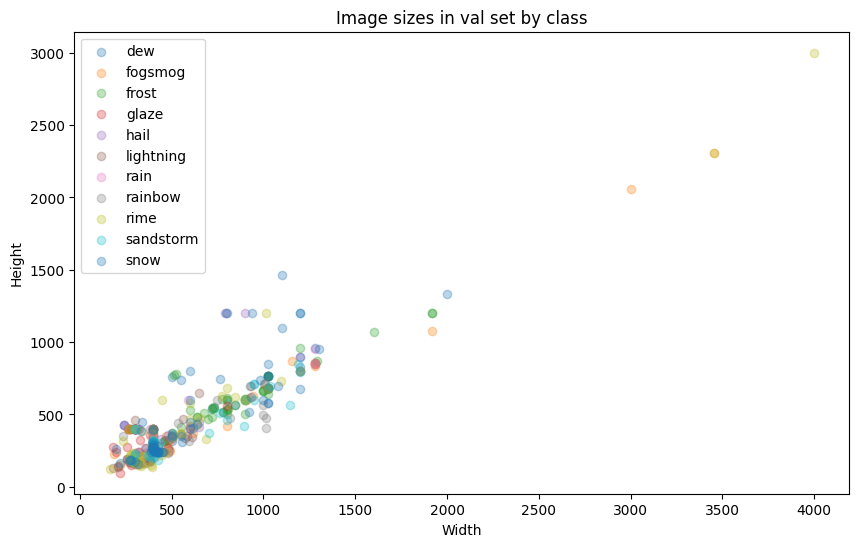

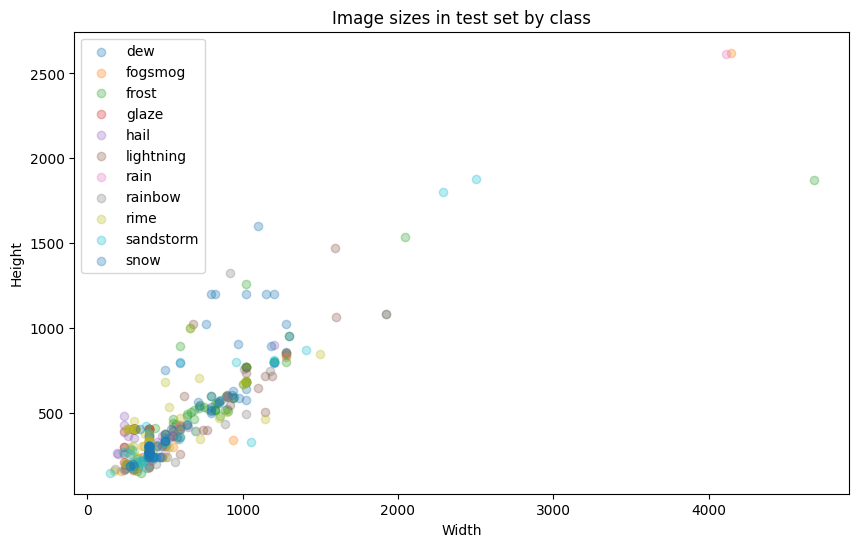

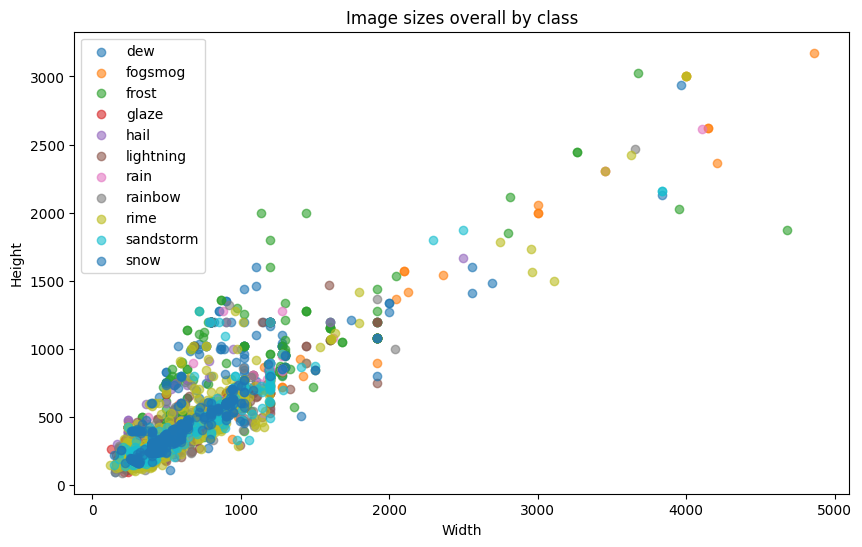

In [13]:
def get_dims(file):
    im = Image.open(file)
    arr = np.array(im)
    if len(arr.shape) == 3:
        h, w, _ = arr.shape  # color image
    else:
        h, w = arr.shape     # grayscale image
    return h,w

def collect_image_sizes(data_folder):
    sizes = {}  # {split: {class: [(h,w), ...]}}
    overall = {}  # {class: [(h,w), ...]} disregarding split

    for split in ['train', 'val', 'test']:
        split_path = os.path.join(data_folder, split)
        sizes[split] = {}
        for class_name in os.listdir(split_path):
            class_path = os.path.join(split_path, class_name)
            if not os.path.isdir(class_path):
                continue
            files = [os.path.join(class_path, f) for f in os.listdir(class_path) if f.lower().endswith(('png','jpg','jpeg'))]
            class_sizes = [get_dims(f) for f in files]
            sizes[split][class_name] = class_sizes

            if class_name not in overall:
                overall[class_name] = []
            overall[class_name].extend(class_sizes)

    return sizes, overall


def plot_sizes(sizes, overall):
    # 1. Plot by split and class
    for split, split_data in sizes.items():
        plt.figure(figsize=(10,6))
        for class_name, dims in split_data.items():
            heights = [h for h,w in dims]
            widths = [w for h,w in dims]
            plt.scatter(widths, heights, label=class_name, alpha=0.3)
        plt.xlabel("Width")
        plt.ylabel("Height")
        plt.title(f"Image sizes in {split} set by class")
        plt.legend()
        plt.show()

    # 2. Overall plot by class
    plt.figure(figsize=(10,6))
    for class_name, dims in overall.items():
        heights = [h for h,w in dims]
        widths = [w for h,w in dims]
        plt.scatter(widths, heights, label=class_name, alpha=0.6)
    plt.xlabel("Width")
    plt.ylabel("Height")
    plt.title("Image sizes overall by class")
    plt.legend()
    plt.show()

# Usage:
data_folder = "../data"  # your structured folder
sizes, overall = collect_image_sizes(data_folder)
plot_sizes(sizes, overall)

### Color analysis / Mean image

In [25]:
def get_all_class_images(data_folder):
    """Collects all images per class across train/val/test."""
    classes = {}
    for split in ["train", "val", "test"]:
        split_path = os.path.join(data_folder, split)
        if not os.path.exists(split_path):
            continue
        for class_name in os.listdir(split_path):
            class_path = os.path.join(split_path, class_name)
            if not os.path.isdir(class_path):
                continue
            files = [os.path.join(class_path, f) 
                     for f in os.listdir(class_path) 
                     if f.lower().endswith(("png","jpg","jpeg"))]
            if class_name not in classes:
                classes[class_name] = []
            classes[class_name].extend(files)
    return classes

def compute_mean_image(image_paths, size=(224,224)):
    """Compute mean image from a list of paths."""
    arrays = []
    for f in image_paths:
        try:
            im = Image.open(f).convert("RGB").resize(size)  # force RGB + resize
            arrays.append(np.array(im, dtype=np.float32))
        except Exception as e:
            print(f"Skipping {f}: {e}")
    if not arrays:
        return None
    mean_array = np.mean(arrays, axis=0).astype(np.uint8)
    return Image.fromarray(mean_array)

def plot_mean_images(class_images, size=(224,224), title="Mean Image per Class"):
    """Compute and plot mean image per class with tighter spacing."""
    
    n_classes = len(class_images)

    # Choose grid (close to square)
    n_cols = min(n_classes, 6)  # up to 5 per row
    n_rows = (n_classes + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 4*n_rows))
    axes = np.array(axes).reshape(-1)  # flatten for easy iteration

    for ax, (class_name, files) in zip(axes, class_images.items()):
        mean_img = compute_mean_image(files, size=size)
        if mean_img is not None:
            ax.imshow(mean_img)
            ax.set_title(class_name, fontsize=12)
        ax.axis("off")

    # Hide unused axes if classes < grid size
    for ax in axes[len(class_images):]:
        ax.axis("off")

    plt.tight_layout()
    plt.subplots_adjust(top=0.88)  # push plots down a bit
    fig.suptitle(title, fontsize=18, y=0.98)  # position title above plots
    plt.show()


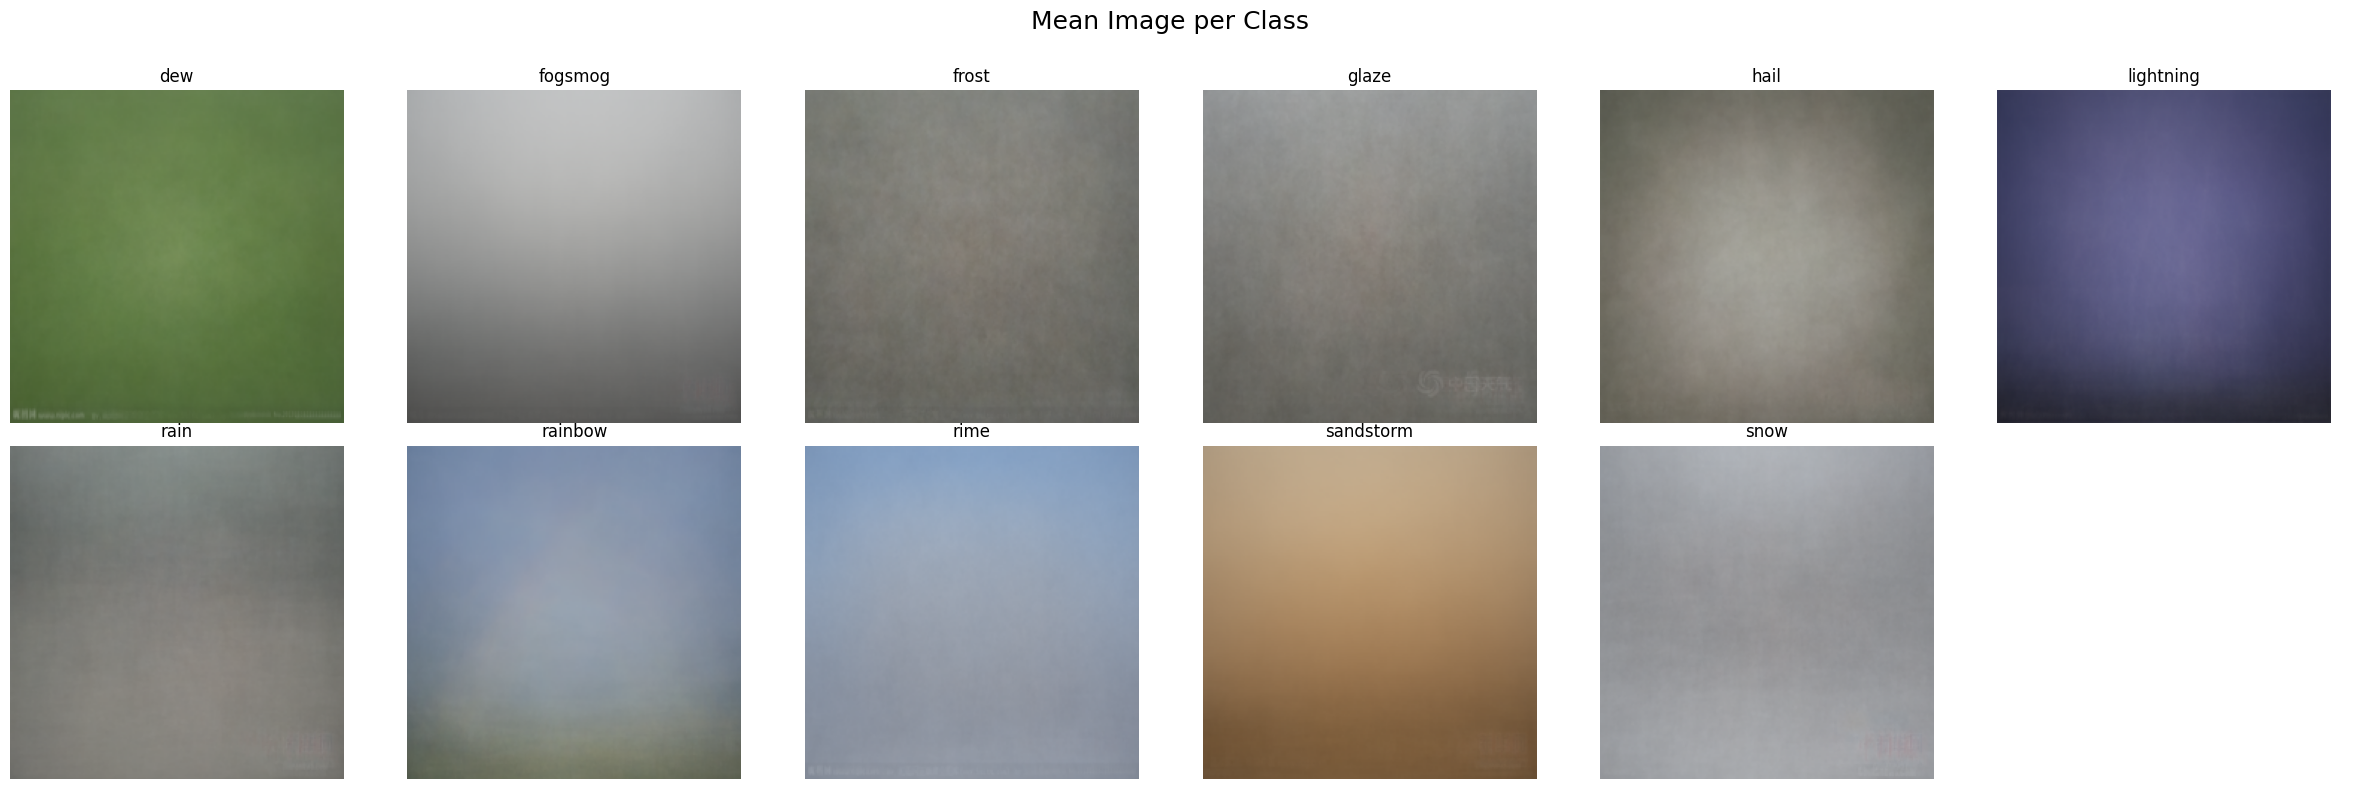

In [ ]:
data_folder = "../data"
class_images = get_all_class_images(data_folder)

plot_mean_images(class_images, size=(224,224))

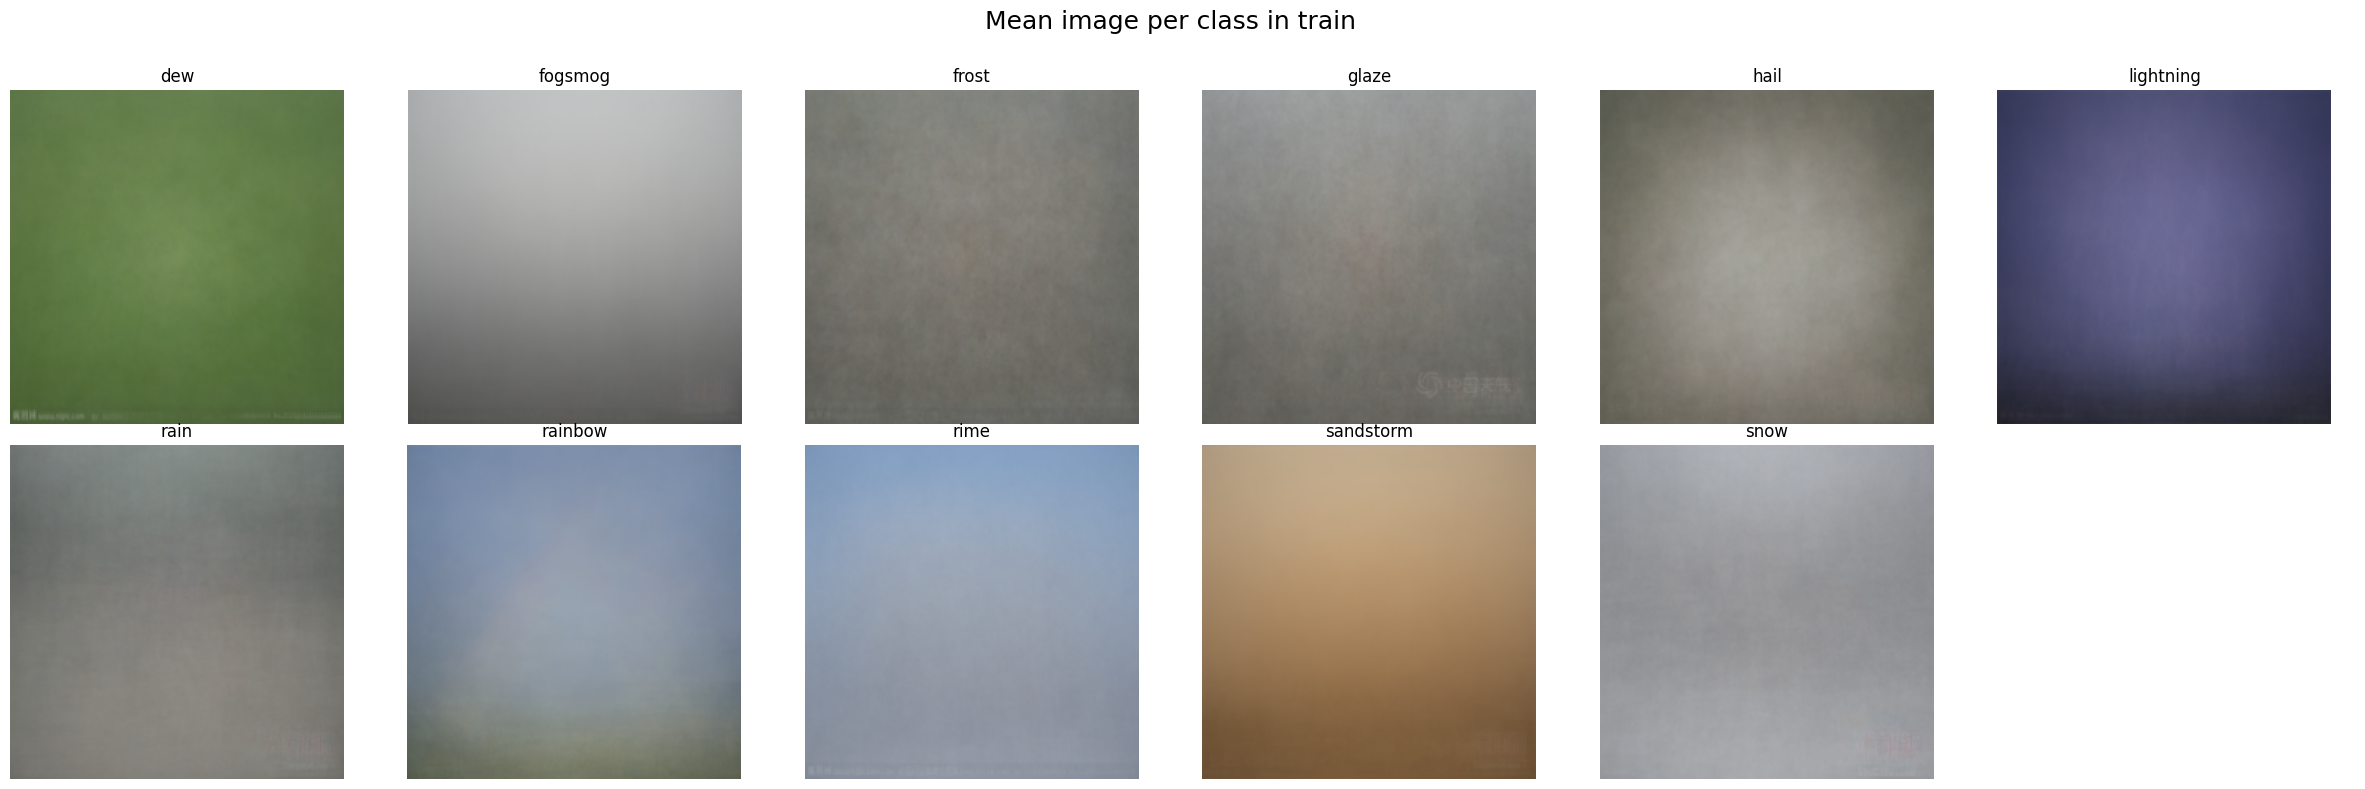

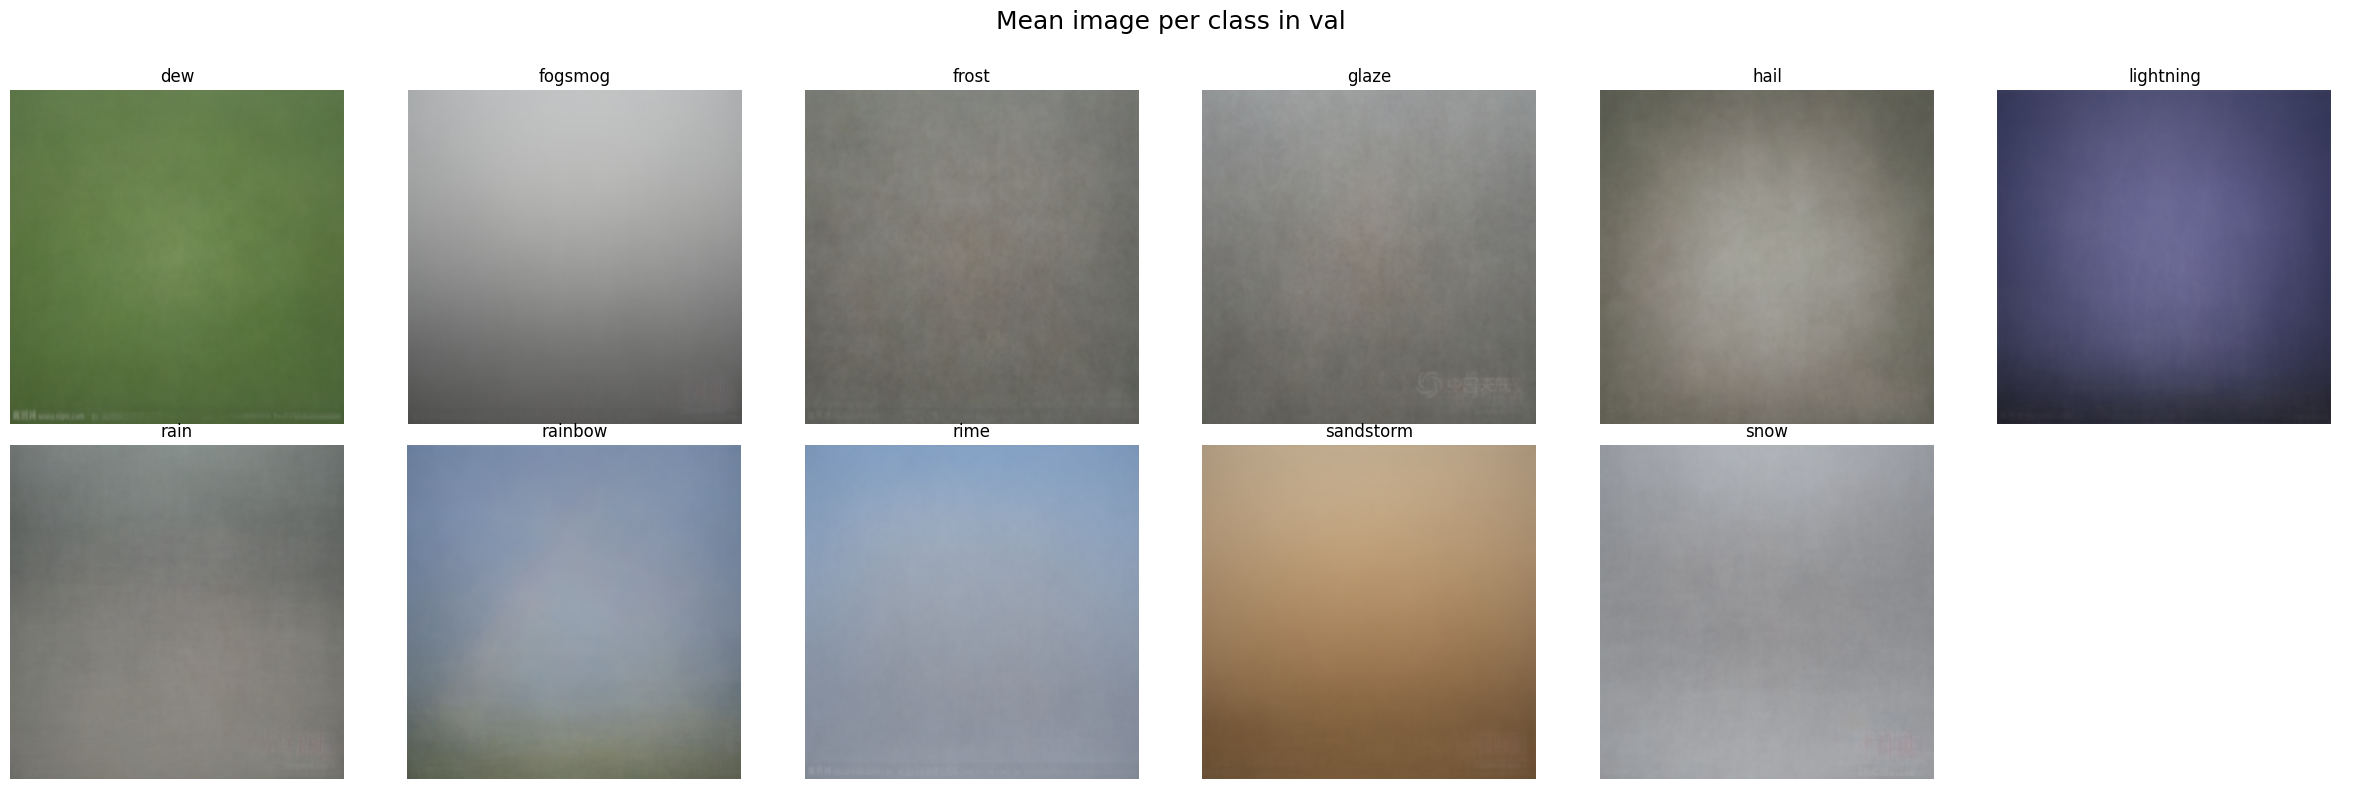

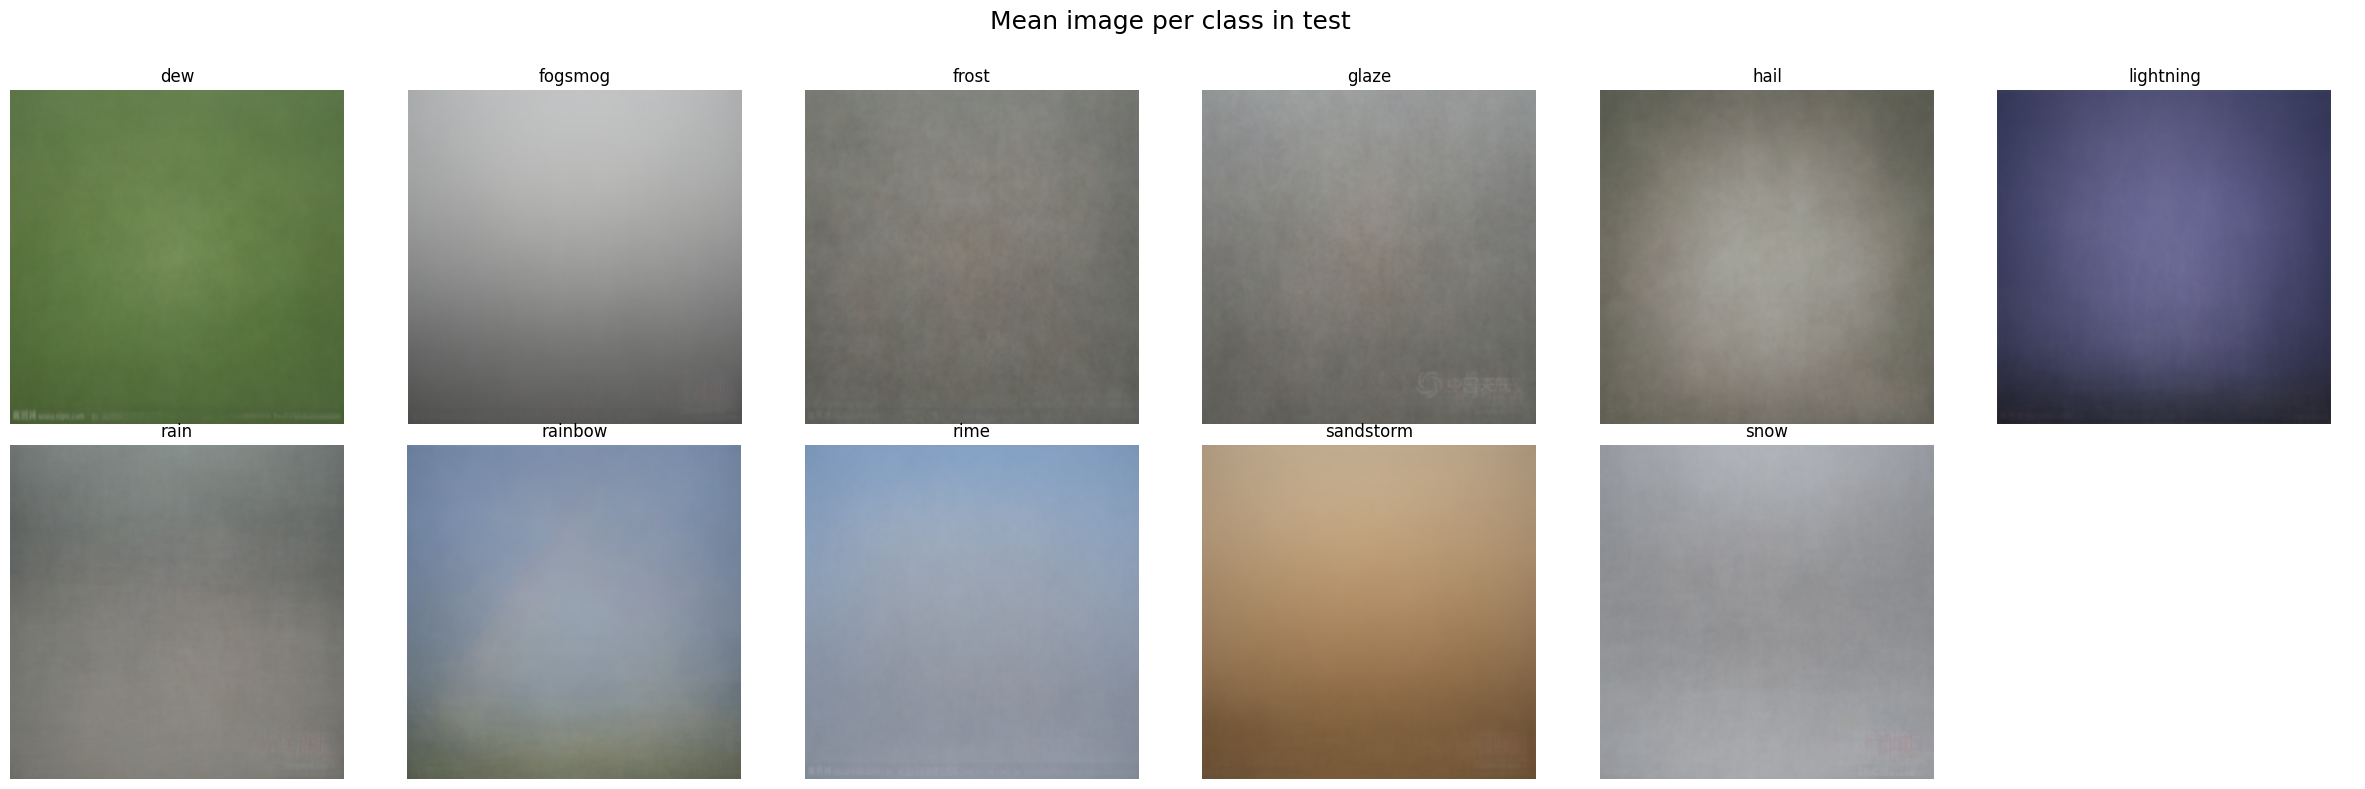

In [26]:
folders = ["../data/train", "../data/val", "../data/test"]
for folder_path in folders:
    set = os.path.basename(folder_path)  # train / val / test
    title = f"Mean image per class in {set}"
    class_images = get_all_class_images(data_folder)
    plot_mean_images(class_images, size=(224,224), title=title)